In [1]:
import numpy as np
import axelrod as axl
import pandas as pd
from MachineLearning import create_test_df, clean_test_df, create_large_df

In [2]:
strategies = [axl.TitForTat(), axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.WinStayLoseShift(), axl.Bully()]
strategies = list(np.repeat(strategies, 3))

In [3]:
test_df = create_test_df(strategies)
test_df.head(10)

,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate
0,0,Dual Joss-Ann Tit For Tat,3.018056,0.113611,14.0,0.000000,0.046111,0.067500,0.498333,0.388056
1,1,Defector,3.013600,0.000000,23.0,0.000000,0.000000,0.000000,0.503400,0.496600
2,2,Dual Joss-Ann Tit For Tat,3.000000,0.000000,15.0,0.000000,0.000000,0.000000,0.500000,0.500000
3,3,Defector,2.996800,0.000000,23.0,0.000000,0.000000,0.000000,0.499200,0.500800
4,4,Defector,2.988800,0.000000,22.0,0.000000,0.000000,0.000000,0.497200,0.502800
5,5,Dual Joss-Ann Tit For Tat,2.986667,0.209167,15.0,0.000000,0.088611,0.120556,0.482500,0.308333
6,6,Dual Joss-Ann Tit For Tat,2.920278,0.303056,13.0,0.000000,0.137778,0.165278,0.452500,0.244444
7,7,Dual Joss-Ann Tit For Tat,2.649167,0.248333,15.0,0.333333,0.131389,0.116944,0.375833,0.375833
8,8,Joss-Ann Tit For Tat,2.632222,0.117222,15.0,0.388889,0.065000,0.052222,0.388611,0.494167
9,9,Dual Joss-Ann Tit For Tat,2.529722,0.360833,14.0,0.166667,0.181667,0.179167,0.336389,0.302778


In [4]:
cleaned_test_df = clean_test_df(test_df)
cleaned_test_df.head(10)

,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate
1,Defector,0.60272,0.0000,23.0,0.0,0.0000,0.0000,0.5034,0.4966
3,Defector,0.59936,0.0000,23.0,0.0,0.0000,0.0000,0.4992,0.5008
4,Defector,0.59776,0.0000,22.0,0.0,0.0000,0.0000,0.4972,0.5028
11,Win-Stay Lose-Shift,0.47872,0.5502,9.0,1.0,0.3338,0.2164,0.2356,0.2142
15,Bully,0.47072,0.4946,11.0,0.0,0.1654,0.3292,0.3380,0.1674
16,Bully,0.47068,0.4952,11.0,0.0,0.1626,0.3326,0.3402,0.1646
17,Win-Stay Lose-Shift,0.46996,0.5528,7.0,1.0,0.3310,0.2218,0.2274,0.2198
18,Win-Stay Lose-Shift,0.46588,0.5584,7.0,1.0,0.3354,0.2230,0.2204,0.2212
20,Bully,0.46128,0.5048,11.0,0.0,0.1600,0.3448,0.3328,0.1624
23,Alternator,0.44728,0.5000,13.0,1.0,0.2444,0.2556,0.2508,0.2492


In [5]:
training_df = create_large_df(cleaned_test_df)
training_df.head(10)

,Equivalent,CC_rate_r,CD_rate_r,DC_rate_r,DD_rate_r,Cooperation_rating_r,Initial_C_rate_r,Median_score_r,Wins_r
0,1,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000
1,1,1.0,1.0,0.991657,0.991613,1.0,1.0,0.994425,1.000000
2,1,1.0,1.0,0.987684,0.987669,1.0,1.0,0.991771,0.956522
3,0,0.0,0.0,0.468017,0.431333,0.0,0.0,0.794266,0.391304
4,0,0.0,0.0,0.671434,0.337092,0.0,1.0,0.780993,0.478261
5,0,0.0,0.0,0.675805,0.331454,0.0,1.0,0.780926,0.478261
6,0,0.0,0.0,0.451728,0.442610,0.0,0.0,0.779732,0.304348
7,0,0.0,0.0,0.437823,0.445429,0.0,0.0,0.772963,0.304348
8,0,0.0,0.0,0.661104,0.327024,0.0,1.0,0.765331,0.478261
9,0,0.0,0.0,0.498212,0.501812,0.0,0.0,0.742102,0.565217


In [6]:
training_data = training_df.copy()
training_data.drop('Equivalent', axis=1, inplace=True)
equivalent = training_df['Equivalent']

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, auc, roc_curve
import seaborn as sns
import itertools
import matplotlib.pyplot as plt


In [13]:
log_model = LogisticRegression()
log_model.fit(X=training_data, y=equivalent)
print(log_model.score(X=training_data, y=equivalent))
print(log_model.predict(training_data))
pd.DataFrame(list(zip(training_data.columns, np.transpose(log_model.coef_))))

0.993827160494
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


,0,1
0,CC_rate_r,[1.76534301567]
1,CD_rate_r,[1.49466214901]
2,DC_rate_r,[1.27154595076]
3,DD_rate_r,[1.87362194989]
4,Cooperation_rating_r,[-0.908718593633]
5,Initial_C_rate_r,[0.842480736041]
6,Median_score_r,[-2.73312181924]
7,Wins_r,[2.06157127826]


In [14]:
overall_df = pd.read_csv('large_summary.csv', index_col=0)
overall_df.head(10)

,Equivalent,CC_rate_r,CD_rate_r,DC_rate_r,DD_rate_r,Cooperation_rating_r,Initial_C_rate_r,Median_score_r,Wins_r
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
1,0,0.946276,0.727344,0.870842,0.958269,0.975134,1.0,0.998891,0.857143
2,0,0.952221,0.967528,0.927687,0.898924,0.959943,1.0,0.998245,0.857143
3,0,0.946638,0.742380,0.897783,0.921533,0.984648,1.0,0.997280,0.844828
4,0,0.943635,0.202614,0.792575,0.703270,0.978363,1.0,0.993334,0.877551
5,0,0.940148,0.177134,0.781710,0.698685,0.979501,1.0,0.993093,0.877551
6,0,0.944300,0.316919,0.785937,0.727635,0.988539,1.0,0.988724,0.816327
7,0,0.987571,0.538941,0.863792,0.725029,0.967621,1.0,0.982518,0.918367
8,0,0.958140,0.634307,0.816060,0.807026,0.995198,1.0,0.982216,0.897959
9,0,0.990236,0.623176,0.936557,0.718809,0.937797,1.0,0.975044,0.795918


In [39]:
overall_data = overall_df.copy()
overall_data.drop('Equivalent', axis=1, inplace=True)
overall_equivalent = overall_df['Equivalent']
print(log_model.score(X=overall_data, y=overall_equivalent))

0.9762978379


In [45]:
probabilities = [i[1] for i in log_model.predict_proba(X=overall_data)]
comparison_df = pd.DataFrame({'probability': probabilities,
                              'actual': overall_equivalent})
comparison_df.head(10)

,actual,probability
0,1,0.765578
1,0,0.542357
2,0,0.626208
3,0,0.532142
4,0,0.241937
5,0,0.229859
6,0,0.258128
7,0,0.423838
8,0,0.452686
9,0,0.425443


34410


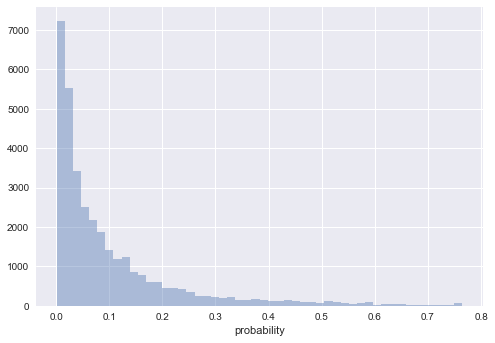

In [79]:
different_df = comparison_df.copy()
different_df = different_df[comparison_df.actual == 0]
different_df.drop('actual', inplace=True, axis=1)
print(len(different_df.index))
sns.distplot(different_df['probability'], kde=False)
plt.show()

186


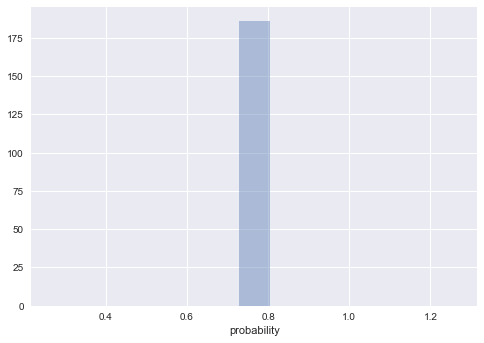

In [78]:
same_df = comparison_df.copy()
same_df = same_df[comparison_df.actual == 1]
same_df.drop('actual', inplace=True, axis=1)
print(len(same_df.index))
sns.distplot(same_df['probability'], kde=False)
plt.show()

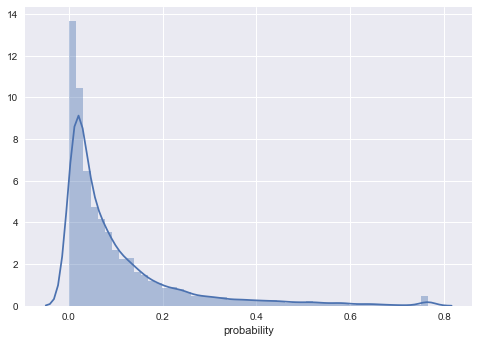

In [72]:
sns.distplot(comparison_df['probability'])
plt.show()

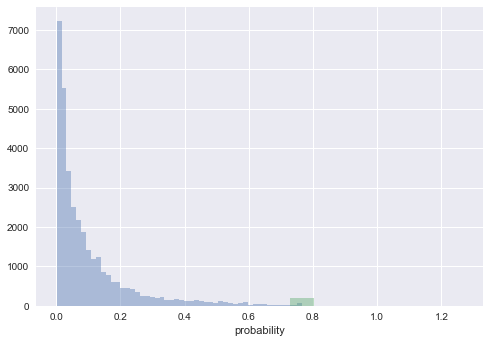

In [77]:
fig, ax = plt.subplots()
for a in [different_df['probability'], same_df['probability']]:
    sns.distplot(a, ax=ax, kde=False)
plt.show()

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33590   820]
 [    0   186]]


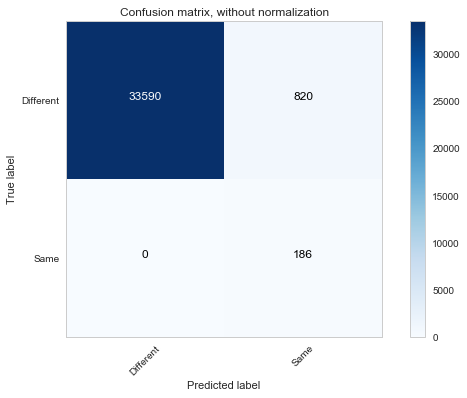

In [18]:
predictions = log_model.predict(X=overall_data)
cnf_matrix = confusion_matrix(overall_equivalent, predictions)
np.set_printoptions(precision=2)
class_names = ['Different', 'Same']
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()
plt.clf()

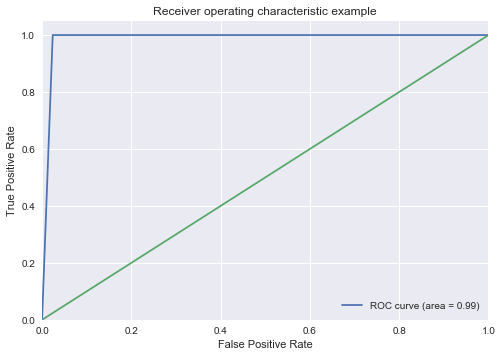

In [29]:
fpr, tpr, _ = roc_curve(overall_equivalent, predictions, pos_label=1)
roc_auc = auc(fpr, tpr)
# Compute micro-average ROC curve and ROC area
sns.set_style('darkgrid')

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
log_model = LogisticRegression()
log_model.fit(X=balanced_training_data, y=balanced_equivalence)
print(log_model.score(X=balanced_training_data, y=balanced_equivalence))
print(log_model.predict(balanced_training_data))
pd.DataFrame(list(zip(training_data.columns, np.transpose(log_model.coef_))))

In [ ]:
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
print(log_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(log_model.predict(unbalanced_training_data))
pd.DataFrame(list(zip(training_data.columns, np.transpose(log_model.coef_))))

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X=balanced_training_data, y=balanced_equivalence)
svm_model.score(X=balanced_training_data, y=balanced_equivalence)
print(svm_model.score(X=balanced_training_data, y=balanced_equivalence))
print(svm_model.predict(balanced_training_data))

In [ ]:
svm_model = svm.SVC(class_weight='balanced')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X=balanced_training_data, y=balanced_equivalence)
svm_model.score(X=balanced_training_data, y=balanced_equivalence)
print(svm_model.score(X=balanced_training_data, y=balanced_equivalence))
print(svm_model.predict(balanced_training_data))


In [ ]:
svm_model = svm.SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
svm_model = svm.SVC(kernel='poly', class_weight='balanced')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))


In [ ]:
svm_model = svm.SVC()
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
svm_model = svm.SVC(class_weight='balanced')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))
# print(svm_model.predict_proba(training_data))

In [ ]:
svm_model = svm.SVC(kernel='poly')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))
# print(svm_model.predict_proba(training_data))

In [ ]:
svm_model = svm.SVC(class_weight='balanced', kernel='poly')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
svm_model = svm.SVC(class_weight='balanced', kernel='linear')
svm_model.fit(X=unbalanced_training_data, y=unbalanced_equivalence)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np

In [ ]:
print('Original dataset shape {}'.format(Counter(unbalanced_equivalence)))
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_sample(unbalanced_training_data, unbalanced_equivalence)
print('Resampled dataset shape {}'.format(Counter(y_res)))

svm_model = svm.SVC(kernel='poly')
svm_model.fit(X=X_res, y=y_res)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))

In [ ]:
print('Original dataset shape {}'.format(Counter(unbalanced_equivalence)))
smt = SMOTETomek(random_state=42)
X_res, y_res = sme.fit_sample(unbalanced_training_data, unbalanced_equivalence)
print('Resampled dataset shape {}'.format(Counter(y_res)))

svm_model = svm.SVC(kernel='poly')
svm_model.fit(X=X_res, y=y_res)
print(svm_model.score(X=unbalanced_training_data, y=unbalanced_equivalence))
print(svm_model.predict(unbalanced_training_data))



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


class_names = ['Different', 'Same']
smt = SMOTETomek(random_state=18)
X_res, y_res = sme.fit_sample(unbalanced_training_data, unbalanced_equivalence)
classifier = svm.SVC(kernel='poly')
y_pred = classifier.fit(X_res, y_res).predict(unbalanced_training_data)
cnf_matrix = confusion_matrix(unbalanced_equivalence, y_pred)
np.set_printoptions(precision=2)


sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()
plt.clf()

In [ ]:
fpr, tpr, _ = roc_curve(unbalanced_equivalence, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)
# Compute micro-average ROC curve and ROC area
sns.set_style('darkgrid')

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# summary_df = pd.read_csv('std_summary.csv')
# orig_columns = summary_df.columns
# A_columns = [i + '_A' for i in orig_columns]
# B_columns = [i + '_B' for i in orig_columns]
# summary_df_A = summary_df.copy()
# summary_df_B = summary_df.copy()
# summary_df_A.columns = A_columns
# summary_df_B.columns = B_columns
# large_df = pd.DataFrame()
# length = len(summary_df.index)
# for x in range(length):
#     for y in range(length):
#         line = pd.concat([summary_df_A.iloc[x], summary_df_B.iloc[y]])
#         large_df = large_df.append(line, ignore_index=True)

In [ ]:
large_df.head(10)

In [ ]:
large_df.drop('Name_A', axis=1, inplace=True)
large_df.drop('Name_B', axis=1, inplace=True)

In [ ]:
probs = log_model.predict_proba(large_df)
probs

In [ ]:
sum(probs)

In [81]:
strats = [i() for i in axl.strategies]
strats

[Adaptive,
 Adaptive Tit For Tat: 0.5,
 Aggravater,
 ALLCorALLD,
 Alternator,
 Alternator Hunter,
 AntiCycler,
 Anti Tit For Tat,
 Adapative Pavlov 2006,
 Adapative Pavlov 2011,
 Appeaser,
 Arrogant QLearner,
 Average Copier,
 Better and Better,
 BackStabber,
 Bully,
 Calculator,
 Cautious QLearner,
 Champion,
 CollectiveStrategy,
 Contrite Tit For Tat,
 Cooperator,
 Cooperator Hunter,
 Cycle Hunter,
 Cycler CCCCCD,
 Cycler CCCD,
 Cycler CCD,
 Cycler DC,
 Cycler DDC,
 Cycler CCCDCD,
 Davis,
 Defector,
 Defector Hunter,
 Desperate,
 DoubleCrosser,
 Doubler,
 EasyGo,
 Eatherley,
 Eventual Cycle Hunter,
 Evolved ANN,
 Evolved ANN 5,
 Evolved ANN 5 Noise 05,
 Evolved FSM 4,
 Evolved FSM 16,
 Evolved FSM 16 Noise 05,
 EvolvedLookerUp1_1_1,
 EvolvedLookerUp2_2_2,
 Evolved HMM 5,
 Feld,
 Firm But Fair,
 Fool Me Forever,
 Fool Me Once,
 Forgetful Fool Me Once,
 Forgetful Grudger,
 Forgiver,
 Forgiving Tit For Tat,
 Fortress3,
 Fortress4,
 GTFT: 0.33,
 Soft Go By Majority,
 Soft Go By Majority: